# Load Module

In [1]:
from geomux import Geomux, read_table

# Load Input Data

In [2]:
frame = read_table("../data/demux_D0_sgRNA_2.tab")
frame.head()

barcode    guide  n_umi
0  TTTACTGCAGCAGGAT  TBL1XR1      1
1  GGGTAGAGTGGGTCAA     PHF2      8
2  AGCTCAAAGTAGTCTC    GNAI1      3
3  GATCACAAGAGTTCGG    PPP5C      1
4  TTGTTTGCAGAGGTAC    KDM6B      6

# Geomux Demultiplexing

## Initialize Class

In [3]:
gmux = Geomux(min_umi=5, n_jobs=40)

## Fit Params and Distributions

In [4]:
gmux.fit(frame)


            Fitting Model with Params:
                min_umi: 5
                min_lor: 1
                scalar: 0
                n_jobs: 40
            
Initial Size: (381342, 91)
Filtered Size: (77443, 91)

            Population Size (M): 21176027

            Number of Success States (n):
            [255228 242429 188014 307544 256221 233855 126562 271912 144010 244920
 218659 232299 224153 249469 225602 240236 195003 274315 260514 255300
 162695 197783 220238 261371 257395 248943 217674 194840 183316 215984
 262123 208930 263898 221423 221027 216193 247768 252681 242388 157953
 284476 225898 233105 250527 270073 212130 243668 107979 319627 220534
 308268 278577 169010 220115 247502 209459 230386 262693 281914 243571
 165692 200440 249551 178229 219733 237379 137883 223388 235395 265337
 257054 277585 237724 325581 320541 299040 226501 284042 229295 158979
 276586 123080 245796 227022 255043 224954 241757 189023 223301 266348
 253368]

            Number of Draws (N): 
     

## Predict Assignments

In [5]:
gmux.predict()

# Visualizations

## UMAP of Guide-Space for each barcode

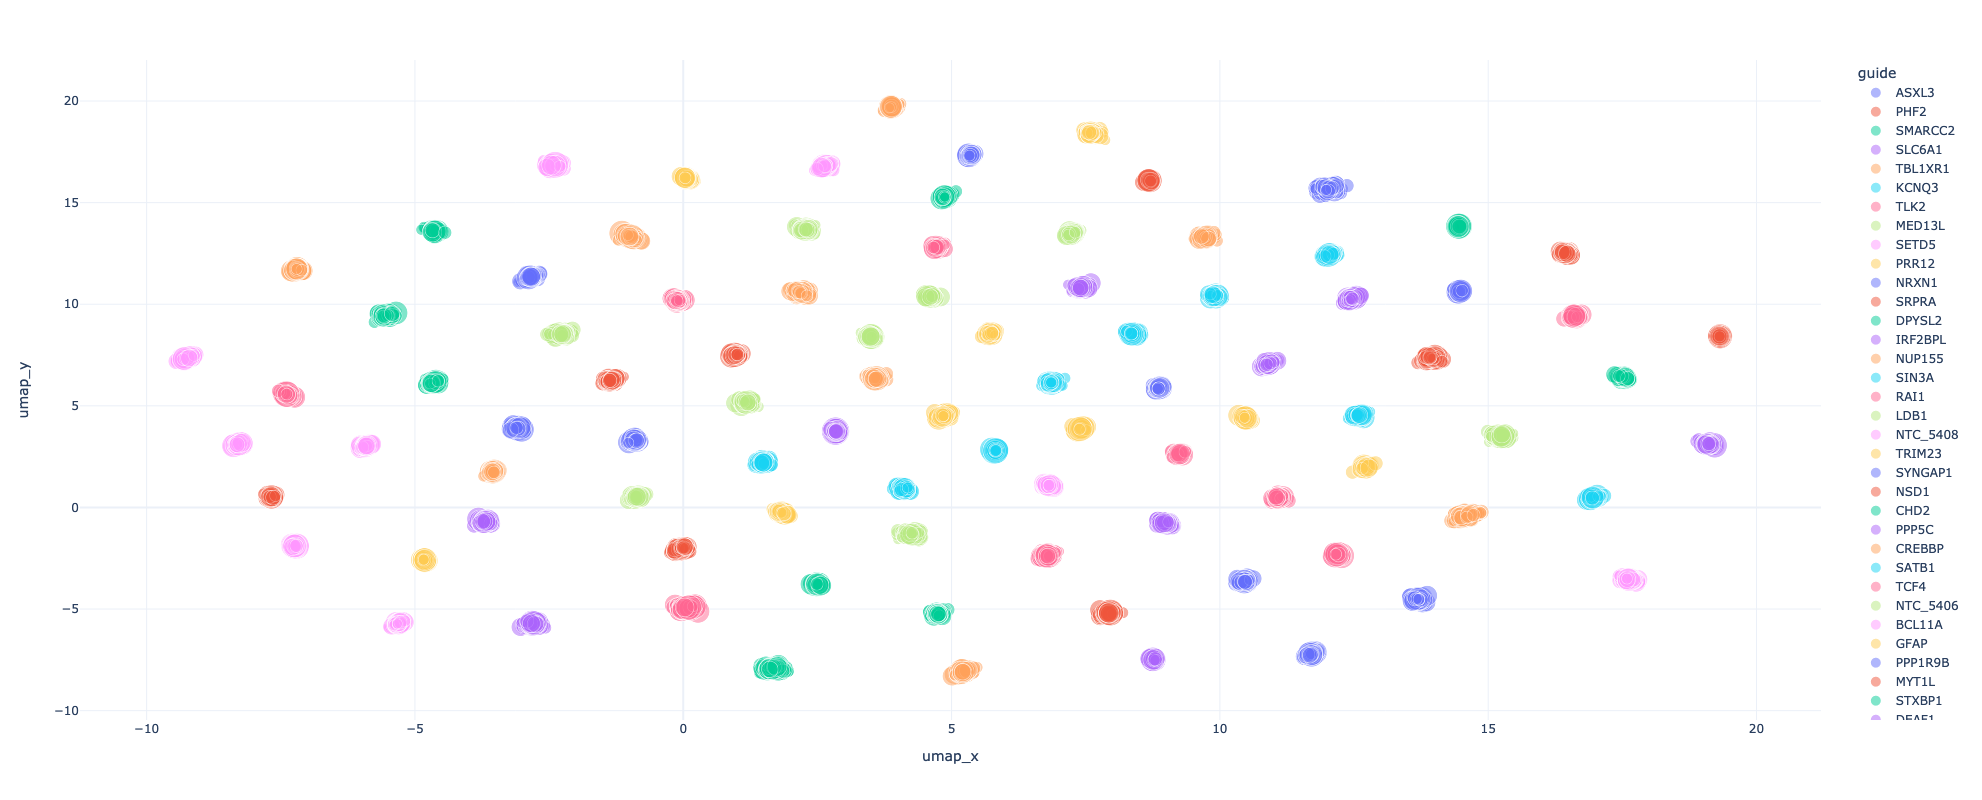

In [6]:
gmux.plot_umap()

## Correlation of LogOddsRatio and Number of UMIs

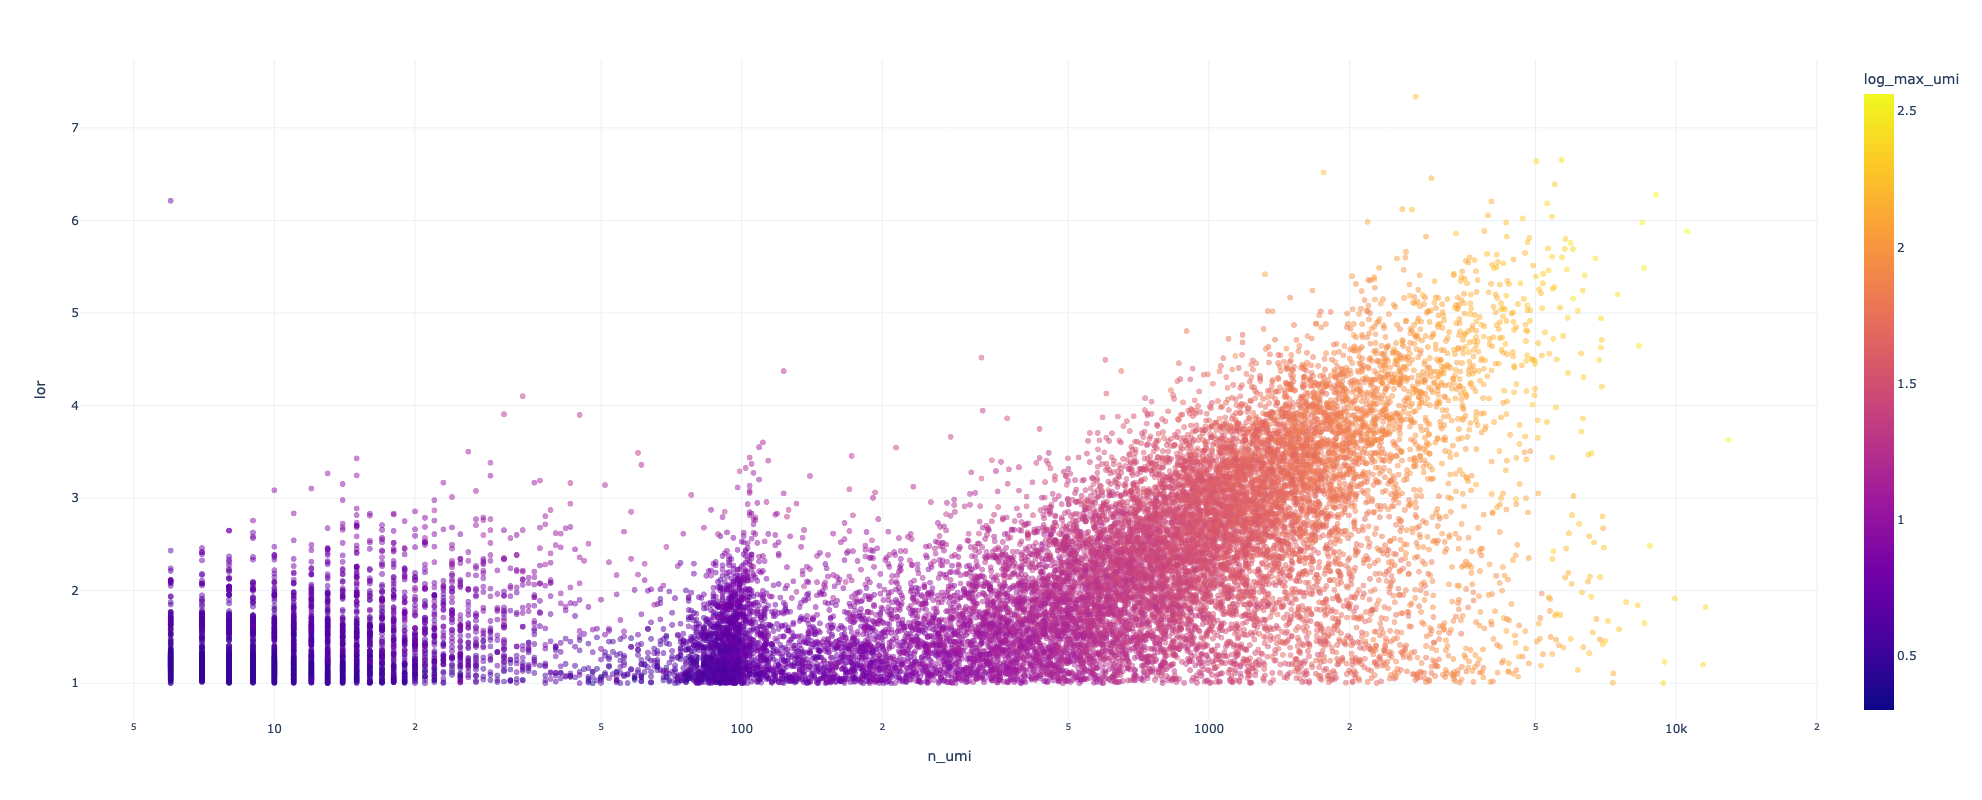

In [7]:
gmux.plot_correlation()

# Recover Assignments

In [8]:
assignments = gmux.assignments()
assignments.head()

barcode    guide       lor        pvalue  max_umi  \
barcode                                                                        
AAACCCAAGCTAGCCC  AAACCCAAGCTAGCCC    ASXL3  2.173572  3.940713e-04     12.0   
AAACCCAAGGCGTCCT  AAACCCAAGGCGTCCT     PHF2  1.517743  3.408464e-02      5.0   
AAACCCAAGTCCTACA  AAACCCAAGTCCTACA  SMARCC2  1.499234  2.995435e-02      8.0   
AAACCCACATGTTACG  AAACCCACATGTTACG   SLC6A1  1.448369  3.653767e-02     10.0   
AAACCCAGTACGTTCA  AAACCCAGTACGTTCA  TBL1XR1  3.451927  5.493000e-08     88.0   

                   n_umi      m_umi      v_umi  log_max_umi  log_n_umi  \
barcode                                                                  
AAACCCAAGCTAGCCC   270.0   2.967033   2.565568     1.079181   2.431364   
AAACCCAAGGCGTCCT    82.0   0.901099   0.334554     0.698970   1.913814   
AAACCCAAGTCCTACA   138.0   1.516484   0.919170     0.903090   2.139879   
AAACCCACATGTTACG   288.0   3.164835   1.405861     1.000000   2.459392   
AAACCCAGTACGTTCA  2407.0  26.450549  64.583639     1.944483   3.381476   

                  log_m_umi     umap_x     umap_y  
barcode                                            
AAACCCAAGCTAGCCC   0.472322   5.373204  17.355337  
AAACCCAAGGCGTCCT  -0.045228  -1.364542   6.319756  
AAACCCAAGTCCTACA   0.180838   1.510650  -7.784938  
AAACCCACATGTTACG   0.500351  12.592279  10.361077  
AAACCCAGTACGTTCA   1.422435   5.264040  -8.002194